In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/상품개발기획MD.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 ...,데이터 사이언스 데이터 엔지니어링 데이터 분석 도구 및 프로그래밍 언어 등 데...
1,PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 ...,신입 혹은 1년 이상의 교육 상품 기획 경력 경영 및 경제학이 전공이신 분 금융 ...
2,PM과 함께 성장을 원하는 사람들에게 필요한 교육 기획 기획부터 마케팅까지 제품 ...,신입 혹은 1년 이상의 교육 상품 기획 경력 프로젝트를 주도적으로 기획실행해본 경...
3,지속적인 시장 조사와 고객 피드백 유저 리서치를 통해 새로운 기회를 찾아내고 ...,AI 기술 및 관련 산업 트렌드에 대한 전반적인 이해와 관심이 있으신 분 소프트웨...
4,마케팅 전략 수립 마케팅 기획 마케팅 집행,성장에 대한 열정이 있으신 분 전략적으로 사고하고 빠르게 실행하실 수 있는 분 주...
...,...,...
206,SNS 채널 운영 및 데이터 분석SNS 포스팅 기획 및 원고 작성체험단 진행 및 관...,학력 초대졸이상경력 25년포트폴리오 제출디자인툴 사용 가능자통계 분석 능숙자 문서...
207,Go To Market 관점 Product Planning 부터 판매Channel전...,필요역량Experienced in team management as a market...
208,브랜드 진단 및 전략 방향성 수립 브랜드 네임 슬로건 및 스토리 개발 브랜드 체계...,사업의 성장에 브랜드가 미치는 영향에 대한 이해가 있는 분전략과 실행 간 끊김 없는...
209,함께할 제휴 파트너스를 발굴해요숙박 티켓 FB 등 경험 상품을 가진 파트너 자사몰...,숙박 레저 등 카테고리에 대한 관련업계의 네트워크를 가지고 있으신 분 온라인 커머...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,데이터 사이언스 데이터 엔지니어링 데이터 분석 도구 및 프로그래밍 언어 등 데...
1,신입 혹은 1년 이상의 교육 상품 기획 경력 경영 및 경제학이 전공이신 분 금융 ...
2,신입 혹은 1년 이상의 교육 상품 기획 경력 프로젝트를 주도적으로 기획실행해본 경...
3,AI 기술 및 관련 산업 트렌드에 대한 전반적인 이해와 관심이 있으신 분 소프트웨...
4,성장에 대한 열정이 있으신 분 전략적으로 사고하고 빠르게 실행하실 수 있는 분 주...
...,...
206,학력 초대졸이상경력 25년포트폴리오 제출디자인툴 사용 가능자통계 분석 능숙자 문서...
207,필요역량Experienced in team management as a market...
208,사업의 성장에 브랜드가 미치는 영향에 대한 이해가 있는 분전략과 실행 간 끊김 없는...
209,숙박 레저 등 카테고리에 대한 관련업계의 네트워크를 가지고 있으신 분 온라인 커머...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/상품개발기획MD(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 데이터 사이언스  데이터 엔지니어링  데이터 분석 도구 및 프로그래밍 언어 등 데이터 사이언스 전반에 대한 관심 및 트렌드에 능하신 분 신입 혹은 1년 이상의 교육 상품 기획 경력 프로젝트를 주도적으로 기획하고 실행해본 경험 혹은 준하는 경험이 있으신 분 데이터를 이해하고 응용하여 사용자 니즈를 파악하는 일에 무리가 없으신 분 팀 기반 업무 진행에 익숙하고 자기 의견을 논리적으로 이야기하실 수 있는 분 기존의 프로세스를 따르는데 익숙하기 보다는 본인만의 프로세스를 구축하며 일하는데 보람을 느끼시는 분 문제해결  목표달성 과정에서 빠르고 과감한 의사결정을 할 수 있으신 분 위에 열거한 러닝스푼즈와 사일로팀에서 하는 일에 대한 순수한 흥미가 있으신 분 이런 분이면 더 좋아요 우대사항 데이터 분석 프로젝트 경험 SQLD  ADSP  정보처리기사 등 데이터 분석 관련 자격증 교육업에 관심이 많고 끊임없는 자기계발에 대한 열정이 있으신 분 창업 경험이 있거나 자기만의 프로젝트를 성공실패 해본 경험이 있으신 분 온오프라인 커뮤니티를 직접 기획운영 해보신 분\n 신입 혹은 1년 이상의 교육 상품 기획 경력 경영 및 경제학이 전공이신 분 금융 시장의 변화를 캐치하실 수 있는 분 주식 채권 펀드 등 투자에 관해 관심이 많은 분 프로젝트를 주도적으로 기획하고 실행해본 경험 or 준하는 경험이 있으신 분 데이터를 이해하고 응용하여 사용자 니즈를 파악하는 일에 무리가 없으신 분 팀 기반 업무 진행에 익숙하고 자기 의견을 논리적으로 이야기하실 수 있는 분 기존의 프로세스를 따르는데 익숙하기 보다는 본인만의 프로세스를 구축하며 일하는데 보람을 느끼시는 분 문제해결  목표달성 과정에서 빠르고 과감한 의사결정을 할 수 있으신 분 위에 열거한 러닝스푼즈와 사일로팀에서 하는 일에 대한 순수한 흥미가 있으신 분 이런 분이면 더 좋아요 우대사항 교육업에 관심이 많고 끊임없는 자기계발에 대한 열정이 있으신 분 창업 경험이 있거나 자기만의 프로젝트를 성공실패 해본 경험이 

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '데이터',
 '사이언스',
 '데이터',
 '엔지니어링',
 '데이터',
 '분석',
 '도구',
 '및',
 '프로그래밍',
 '언어',
 '등',
 '데이터',
 '사이언스',
 '전반',
 '대한',
 '관심',
 '및',
 '트렌드',
 '능',
 '분',
 '신입',
 '이상',
 '교육',
 '상품',
 '기획',
 '경력',
 '프로젝트',
 '주도',
 '기획',
 '실행',
 '경험',
 '준',
 '경험',
 '분',
 '데이터',
 '이해',
 '응용',
 '사용자',
 '를',
 '파악',
 '일',
 '무리',
 '분',
 '팀',
 '기반',
 '업무',
 '진행',
 '자기',
 '의견',
 '논리',
 '이야기',
 '수',
 '분',
 '기존',
 '프로세스',
 '본인',
 '프로세스',
 '구축',
 '일',
 '보람',
 '분',
 '문제해결',
 '목표',
 '달성',
 '과정',
 '과감',
 '의사결정',
 '수',
 '분',
 '위',
 '열거',
 '러닝',
 '스푼',
 '즈',
 '사일로',
 '팀',
 '일',
 '대한',
 '흥미',
 '분',
 '더',
 '우대',
 '사항',
 '데이터',
 '분석',
 '프로젝트',
 '경험',
 '정보처리기사',
 '등',
 '데이터',
 '분석',
 '관련',
 '자격증',
 '교육',
 '업',
 '관심',
 '자기계발',
 '대한',
 '열정',
 '분',
 '창업',
 '경험',
 '자기',
 '프로젝트',
 '성공',
 '실패',
 '경험',
 '분',
 '오프라인',
 '커뮤니티',
 '직접',
 '기획',
 '운영',
 '분',
 '신입',
 '이상',
 '교육',
 '상품',
 '기획',
 '경력',
 '경영',
 '및',
 '경제학',
 '전공',
 '분',
 '금융',
 '시장',
 '변화',
 '캐치',
 '수',
 '분',
 '주식',
 '채권',
 '펀드',
 '등',
 '투자',


In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

9673
1040


FreqDist({'분': 895, '경험': 373, '경력': 266, '및': 245, '대한': 172, '기획': 172, '이상': 164, '업무': 147, '능력': 119, '보유': 107, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '이해','필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '데이터',
 '사이언스',
 '데이터',
 '엔지니어링',
 '데이터',
 '분석',
 '도구',
 '프로그래밍',
 '언어',
 '데이터',
 '사이언스',
 '전반',
 '트렌드',
 '능',
 '신입',
 '교육',
 '상품',
 '기획',
 '프로젝트',
 '주도',
 '기획',
 '준',
 '데이터',
 '응용',
 '사용자',
 '를',
 '파악',
 '무리',
 '기반',
 '진행',
 '자기',
 '의견',
 '논리',
 '이야기',
 '기존',
 '프로세스',
 '본인',
 '프로세스',
 '구축',
 '보람',
 '문제해결',
 '목표',
 '달성',
 '과정',
 '과감',
 '의사결정',
 '열거',
 '러닝',
 '스푼',
 '즈',
 '사일로',
 '흥미',
 '사항',
 '데이터',
 '분석',
 '프로젝트',
 '정보처리기사',
 '데이터',
 '분석',
 '자격증',
 '교육',
 '업',
 '자기계발',
 '열정',
 '창업',
 '자기',
 '프로젝트',
 '성공',
 '실패',
 '오프라인',
 '커뮤니티',
 '직접',
 '기획',
 '운영',
 '신입',
 '교육',
 '상품',
 '기획',
 '경영',
 '경제학',
 '전공',
 '금융',
 '시장',
 '변화',
 '캐치',
 '주식',
 '채권',
 '펀드',
 '투자',
 '관해',
 '프로젝트',
 '주도',
 '기획',
 '준',
 '데이터',
 '응용',
 '사용자',
 '를',
 '파악',
 '무리',
 '기반',
 '진행',
 '자기',
 '의견',
 '논리',
 '이야기',
 '기존',
 '프로세스',
 '본인',
 '프로세스',
 '구축',
 '보람',
 '문제해결',
 '목표',
 '달성',
 '과정',
 '과감',
 '의사결정',
 '열거',
 '러닝',
 '스푼',
 '즈',
 '사일로',
 '흥미',
 '사항',
 '교육',
 '업',
 '자기계발',
 '열정',
 '창업',
 '자기',
 '프로젝트',

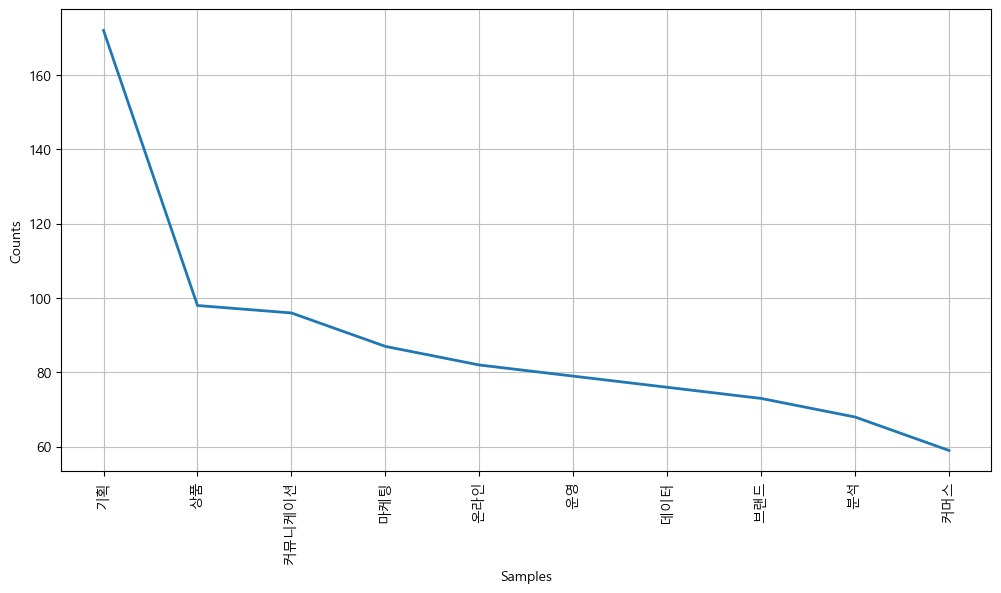

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

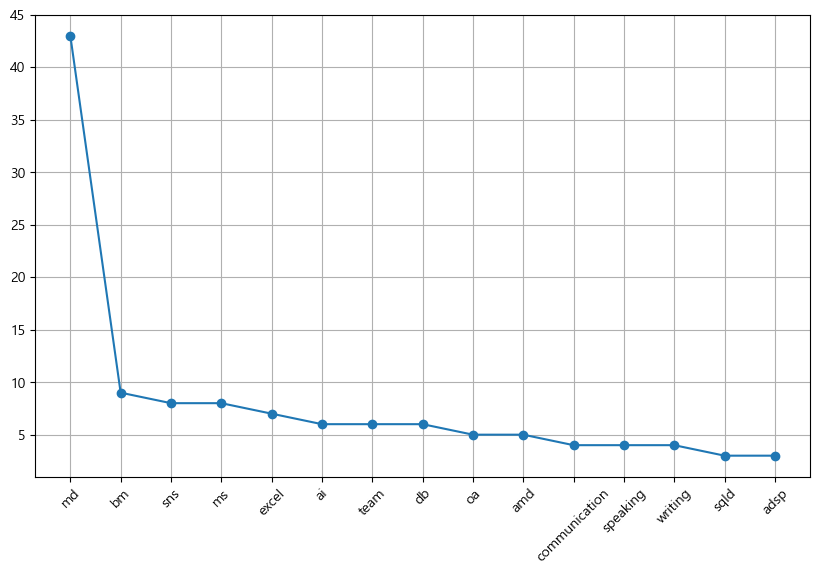

In [11]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)